In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np



def get_all_datasets(hdf_file):
    datasets = {}

    def collect_datasets(name, obj):
        if isinstance(obj, h5py.Dataset):
            datasets[name] = obj[:]

    hdf_file.visititems(collect_datasets)
    return datasets

def nice_dict_contents(data_dict, print_keys=False):
    outer_keys = {}
    for key in data_dict.keys():
        num_levels = len(key.split('/'))
        outer = key.split('/')[0]
        if num_levels == 2:
            inner = key.split('/')[1]
            if outer not in outer_keys.keys():
                outer_keys[outer] = []
            outer_keys[outer].append(inner)
        else:
            middle = key.split('/')[1]
            inner = key.split('/')[2]
            if outer not in outer_keys.keys():
                outer_keys[outer] = {}
            if middle not in outer_keys[outer].keys():
                outer_keys[outer][middle] = []
            outer_keys[outer][middle].append(inner)


    if print_keys:
        print('CONTENTS OF HDF5 FILE:')
        for key, v in outer_keys.items():
            print(key)
            if isinstance(v, list):
                #for i in v:
                print('\t', ', '.join(v))
            else:
                for k, v in v.items():
                    print('\t', k)
                    #for i in v:
                    print('\t\t', ', '.join(v))

def load_data(file_path='C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/a000_1/data.hdf5', verbose=False):
    with h5py.File(file_path, 'r') as hdf_file:
        data_dict = get_all_datasets(hdf_file)
    
    if verbose:
        nice_dict_contents(data_dict, print_keys=True)

    return data_dict


In [2]:

# Function definitions for get_all_datasets and nice_dict_contents

def load_data(file_path='C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/a000_1/data.hdf5', verbose=False):
    with h5py.File(file_path, 'r') as hdf_file:
        data_dict = get_all_datasets(hdf_file)
    
    if verbose:
        nice_dict_contents(data_dict, print_keys=True)

    return data_dict

# # Load the data_dict using the load_data function
data_dict = load_data('C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/a000_1/data.hdf5')

In [3]:
a = data_dict['pose/tango_ori']
b = data_dict['synced/acce']
c = data_dict['pose/tango_pos']


In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate dummy IMU dataset
accelerometer_data = b  # Shape: (samples, 3)
tango_ori_data = a # Shape: (samples, 3)
positions = c  # Shape: (samples, 3)

In [5]:
b.shape

(67610, 3)

In [6]:
a

array([[ 0.34436653,  0.59040797,  0.35096438, -0.64004271],
       [ 0.34441047,  0.59042746,  0.35096543, -0.64000051],
       [ 0.34444966,  0.59044127,  0.35095287, -0.63997356],
       ...,
       [ 0.50364454, -0.51129683,  0.56506173,  0.40696871],
       [ 0.50353097, -0.51139132,  0.56512039,  0.40690905],
       [ 0.50341483, -0.51148041,  0.56518603,  0.40684961]])

In [7]:
data = np.concatenate((accelerometer_data, tango_ori_data), axis=1)  

In [8]:
data.shape

(67610, 7)

In [9]:
# Convert the NumPy array into a pandas DataFrame
dfX = pd.DataFrame(data)
dfy = pd.DataFrame(c)

In [10]:
X = dfX
y = dfy

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
import pandas as pd

In [13]:
ct = make_column_transformer(
    (StandardScaler(), list(X.columns)),
    remainder='passthrough'
    )

ct.fit(X_train)
ct.transform(X_train)
ct.transform(X_test)
ct.transform(X_valid);

In [14]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3, activation='linear')
])

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [16]:
model.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])
# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid),callbacks=[reduce_lr])

Epoch 1/20


C:\Users\Chris Bhysicisd\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1353/1353 [==============================] - 4s 2ms/step - loss: 5.4275 - mae: 5.4275 - val_loss: 4.9387 - val_mae: 4.9387 - lr: 0.0100
Epoch 2/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.8452 - mae: 4.8452 - val_loss: 4.4500 - val_mae: 4.4500 - lr: 0.0100
Epoch 3/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.3865 - mae: 4.3865 - val_loss: 4.1997 - val_mae: 4.1997 - lr: 0.0100
Epoch 4/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.2039 - mae: 4.2039 - val_loss: 4.1678 - val_mae: 4.1678 - lr: 0.0100
Epoch 5/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.1459 - mae: 4.1459 - val_loss: 4.3467 - val_mae: 4.3467 - lr: 0.0100
Epoch 6/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.0997 - mae: 4.0997 - val_loss: 4.1157 - val_mae: 4.1157 - lr: 0.0100
Epoch 7/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.0348 - mae: 4.0348 - val_loss: 4.0589 - val_mae: 4.

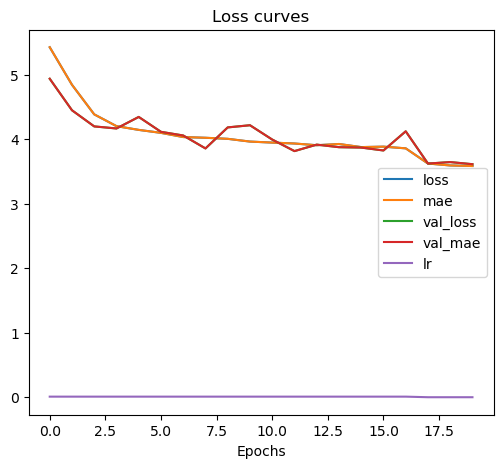

In [17]:
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend();

In [18]:
pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae,lr
0,5.427532,5.427532,4.938663,4.938663,0.010
1,4.845226,4.845226,4.449991,4.449991,0.010
2,4.386457,4.386457,4.199736,4.199736,0.010
3,4.203873,4.203873,4.167778,4.167778,0.010
4,4.145854,4.145854,4.346693,4.346693,0.010
5,4.099731,4.099731,4.115746,4.115746,0.010
6,4.034801,4.034801,4.058880,4.058880,0.010
7,4.023513,4.023513,3.858277,3.858277,0.010
8,4.007269,4.007269,4.184288,4.184288,0.010
9,3.964579,3.964579,4.217905,4.217905,0.010


423/423 [==============================] - 1s 1ms/step


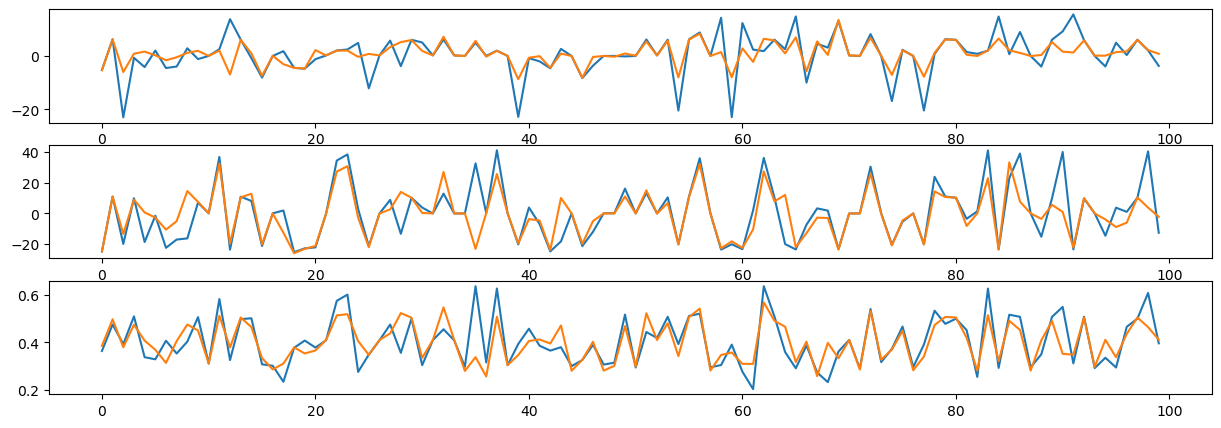

In [19]:
fig, ax = plt.subplots(3,1, figsize = (15,5))
N = 100
y_pred = model.predict(X_test)
for i in range(3):
    ax[i].plot(y_test.values[:N,i])
    ax[i].plot(y_pred[:N,i])

In [20]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np



def load_much_data(N_train, N_test, folder_path, columns_X, columns_y, seq_length=1, verbose=False, num_datasets=1, random_start=False):
    """
    Function to load data from multiple HDF5 files.

    Args:
    Ntrain : int
        Number of training instances.
    Nval : int
        Number of validation instances.
    folder_path : str
        Path to the data directory.
    columns : list
        List of column names.

    Returns:
    data_dict : dict
        Dictionary with dataset names as keys and numpy arrays as values.
    """
    data = {
        'X-train': {key: None for key in columns_X},
        'y-train': {key: None for key in columns_y},
        'X-test': {key: None for key in columns_X},
        'y-test': {key: None for key in columns_y},
    }
    Nloaded_points = 0
    # get control of directories
    dirs = os.listdir(folder_path)
    if '.DS_Store' in dirs: dirs.remove('.DS_Store') # remove .DS_Store if present
    test_dir = dirs[:1]
    train_dirs = dirs[1:num_datasets+1]
    print(f'using {test_dir} for testing and the remaining ({len(train_dirs)}) for training')
    

    N_points_per_dir = max(int(N_train/len(train_dirs)), seq_length)
    N_points_per_dir = N_points_per_dir - N_points_per_dir % seq_length
    n_dirs_to_use = int(N_train/N_points_per_dir)
    train_dirs = train_dirs[:n_dirs_to_use+1]
    N_points = N_points_per_dir * len(train_dirs)
    
    print(f'Loading a total of {N_train}, with {N_points_per_dir} points from each of {len(train_dirs)} directories')
    for dir in dirs:
        file_path = os.path.join(folder_path, dir, 'data.hdf5')
        if verbose: print('Loading file:', file_path)
        with h5py.File(file_path, "r") as hdf_file:
            new_data_dict = load_data(file_path)
            Nloaded_points += N_points_per_dir
        if dir in test_dir:
            start = 0 if not random_start else np.random.randint(0, 20000)
            for key in columns_X:
                if data['X-test'][key] is None:
                    data['X-test'][key] = new_data_dict[key][start:start+N_test]
                else:
                    data['X-test'][key] = np.vstack([data['X-test'][key], new_data_dict[key][:N_test]])
            for key in columns_y:
                if data['y-test'][key] is None:
                    data['y-test'][key] = new_data_dict[key][start:start+N_test]
                else:
                    data['y-test'][key] = np.vstack([data['y-test'][key], new_data_dict[key][:N_test]])
        elif dir in train_dirs:
            for key in columns_X:
                if data['X-train'][key] is None:
                    data['X-train'][key] = new_data_dict[key][start:start+N_points_per_dir]
                else:
                    data['X-train'][key] = np.vstack([data['X-train'][key], new_data_dict[key][:N_points_per_dir]])
            for key in columns_y:
                if data['y-train'][key] is None:
                    data['y-train'][key] = new_data_dict[key][start:start+N_points_per_dir]
                else:
                    data['y-train'][key] = np.vstack([data['y-train'][key], new_data_dict[key][:N_points_per_dir]])
        if Nloaded_points >= N_points:
            break

    return data

In [21]:
folder_path = 'C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/datasets/Dataset 1'

In [22]:
Ntrain = 75000
Ntest = 25000
columns_X = ['pose/tango_ori' , 'synced/acce']
columns_y = ['pose/tango_pos']
seq_length=1
verbose=False
num_datasets=5
random_start=False

In [23]:
  params = {'N_train': Ntrain, 
               'N_test': Ntest,
               'columns_X' : columns_X,
               'columns_y' : columns_y,
               'seq_length': seq_length, 
               'verbose': False, 'num_datasets':num_datasets,
               'random_start':random_start,
               }

In [24]:
import os
data = load_much_data(folder_path=folder_path, **params)

using ['a000_1'] for testing and the remaining (5) for training
Loading a total of 75000, with 15000 points from each of 5 directories


In [25]:
data

{'X-train': {'pose/tango_ori': array([[ 0.55092958,  0.48476543,  0.46269514, -0.497386  ],
         [ 0.55095712,  0.48475588,  0.46268174, -0.49737725],
         [ 0.55099131,  0.48473399,  0.46266642, -0.49737497],
         ...,
         [ 0.40898312,  0.58862729,  0.41495481, -0.56041302],
         [ 0.41011255,  0.58803002,  0.41554633, -0.55977599],
         [ 0.41124103,  0.58743044,  0.41613752, -0.55913807]]),
  'synced/acce': array([[-9.84701283, -0.85775104, -0.98330132],
         [-9.84385864, -0.86169483, -1.00000386],
         [-9.86896548, -0.803299  , -1.00676337],
         ...,
         [-7.36414618, -7.18058849,  0.46110835],
         [-7.43890646, -7.1483128 ,  0.50672094],
         [-7.50202427, -6.94777464,  0.56611501]])},
 'y-train': {'pose/tango_pos': array([[-1.50901492e-02,  1.69271899e-02, -3.95125726e-02],
         [-1.51111942e-02,  1.70681529e-02, -3.95162749e-02],
         [-1.51307102e-02,  1.72108016e-02, -3.95222404e-02],
         ...,
         [-1.450

In [26]:
X_train = data['X-train']['pose/tango_ori']
X_train2 = data['X-train']['synced/acce']
X_test = data['X-test']['pose/tango_ori']
X_test2 = data['X-test']['synced/acce']
y_test = data['y-test']['pose/tango_pos']
y_train = data['y-train']['pose/tango_pos']

In [27]:
X_train.shape

(60000, 4)

In [28]:
X_train2.shape

(60000, 3)

In [29]:
Xposeori = np.concatenate((X_train, X_test), axis=0)

In [30]:
Xposeori

array([[ 0.55092958,  0.48476543,  0.46269514, -0.497386  ],
       [ 0.55095712,  0.48475588,  0.46268174, -0.49737725],
       [ 0.55099131,  0.48473399,  0.46266642, -0.49737497],
       ...,
       [-0.14010392,  0.62803394, -0.23081349, -0.72984241],
       [-0.13931787,  0.62775609, -0.22942652, -0.73066877],
       [-0.1384834 ,  0.62754656, -0.22801986, -0.73144731]])

In [31]:
Xacce = np.concatenate((X_train2, X_test2), axis=0)

In [32]:
Xacce.shape

(85000, 3)

In [33]:
Xtotal = np.concatenate((Xacce,Xposeori), axis =1)

In [34]:
Xtotal

array([[-9.84701283, -0.85775104, -0.98330132, ...,  0.48476543,
         0.46269514, -0.497386  ],
       [-9.84385864, -0.86169483, -1.00000386, ...,  0.48475588,
         0.46268174, -0.49737725],
       [-9.86896548, -0.803299  , -1.00676337, ...,  0.48473399,
         0.46266642, -0.49737497],
       ...,
       [ 2.10015795,  9.44203831,  3.88946522, ...,  0.62803394,
        -0.23081349, -0.72984241],
       [ 2.17791303,  9.40251112,  3.94928503, ...,  0.62775609,
        -0.22942652, -0.73066877],
       [ 2.28565101,  9.3782083 ,  4.01357517, ...,  0.62754656,
        -0.22801986, -0.73144731]])

In [35]:
ytotal = np.concatenate((y_test, y_train), axis=0)  

In [36]:
ytotal

array([[ 0.04820056,  0.04020005,  0.31133411],
       [ 0.04822482,  0.04023623,  0.31135088],
       [ 0.04824895,  0.04027329,  0.3113661 ],
       ...,
       [-1.45020364, 32.37758217,  0.54125501],
       [-1.45086096, 32.38096247,  0.54096531],
       [-1.45151831, 32.38434287,  0.54067561]])

In [37]:
X_many = pd.DataFrame(Xtotal)
y_many = pd.DataFrame(ytotal)

In [38]:
X_many

,0,1,2,3,4,5,6
0,-9.847013,-0.857751,-0.983301,0.550930,0.484765,0.462695,-0.497386
1,-9.843859,-0.861695,-1.000004,0.550957,0.484756,0.462682,-0.497377
2,-9.868965,-0.803299,-1.006763,0.550991,0.484734,0.462666,-0.497375
3,-9.866617,-0.793322,-1.022375,0.551027,0.484704,0.462659,-0.497372
4,-9.859929,-0.773115,-1.035172,0.551055,0.484675,0.462656,-0.497372
...,...,...,...,...,...,...,...
84995,2.008452,9.465085,3.742638,-0.141331,0.628964,-0.233459,-0.727961
84996,2.017722,9.435798,3.787736,-0.140758,0.628481,-0.232149,-0.728908
84997,2.100158,9.442038,3.889465,-0.140104,0.628034,-0.230813,-0.729842
84998,2.177913,9.402511,3.949285,-0.139318,0.627756,-0.229427,-0.730669


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [40]:
ct = make_column_transformer(
    (StandardScaler(), list(X.columns)),
    remainder='passthrough'
    )

ct.fit(X_train)
ct.transform(X_train)
ct.transform(X_test)
ct.transform(X_valid);

In [41]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3, activation='linear')
])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [43]:
model.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])
# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid),callbacks=[reduce_lr])

Epoch 1/20


C:\Users\Chris Bhysicisd\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1353/1353 [==============================] - 4s 3ms/step - loss: 5.5704 - mae: 5.5704 - val_loss: 5.1276 - val_mae: 5.1276 - lr: 0.0100
Epoch 2/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.9070 - mae: 4.9070 - val_loss: 4.8441 - val_mae: 4.8441 - lr: 0.0100
Epoch 3/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.4238 - mae: 4.4238 - val_loss: 4.2454 - val_mae: 4.2454 - lr: 0.0100
Epoch 4/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.2265 - mae: 4.2265 - val_loss: 4.0931 - val_mae: 4.0931 - lr: 0.0100
Epoch 5/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.1429 - mae: 4.1429 - val_loss: 4.1533 - val_mae: 4.1533 - lr: 0.0100
Epoch 6/20
1353/1353 [==============================] - 3s 3ms/step - loss: 4.1159 - mae: 4.1159 - val_loss: 4.0132 - val_mae: 4.0132 - lr: 0.0100
Epoch 7/20
1353/1353 [==============================] - 3s 2ms/step - loss: 4.0859 - mae: 4.0859 - val_loss: 4.1067 - val_mae: 4.

423/423 [==============================] - 1s 1ms/step


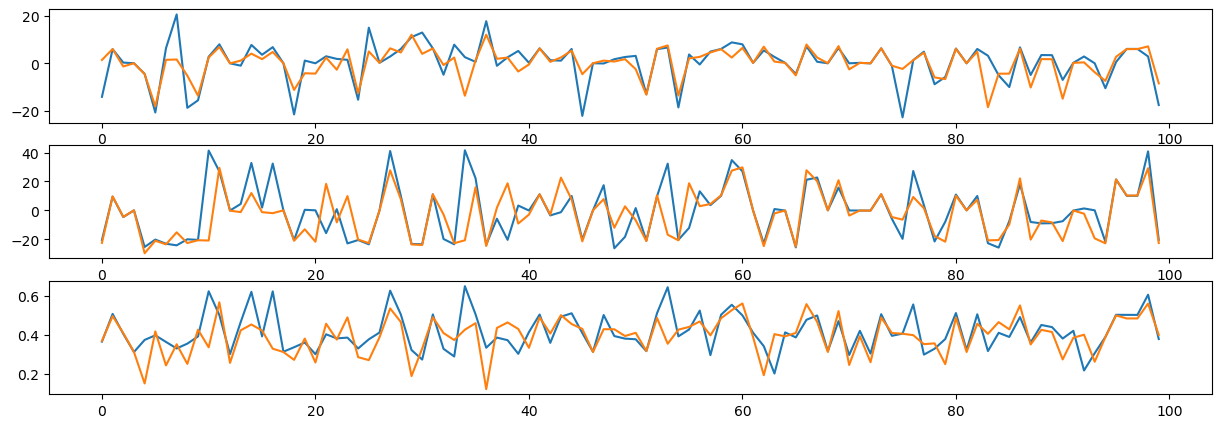

In [44]:
fig, ax = plt.subplots(3,1, figsize = (15,5))
N = 100
y_pred = model.predict(X_test)
for i in range(3):
    ax[i].plot(y_test.values[:N,i])
    ax[i].plot(y_pred[:N,i])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 256)               2816      
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3,667
Trainable params: 3,667
Non-trainable params: 0
_________________________________________________________________


In [47]:
y_pred

array([[  1.4422717 , -22.3892    ,   0.36715528],
       [  6.0493445 ,   9.668678  ,   0.49461025],
       [ -1.3048694 ,  -4.438967  ,   0.4072454 ],
       ...,
       [ -4.903561  , -28.965569  ,   0.10736848],
       [ -1.1615162 ,  -6.416086  ,   0.4466904 ],
       [  2.2467847 ,   0.8205087 ,   0.42440453]], dtype=float32)

In [49]:
type(y_pred)

numpy.ndarray

In [50]:
y_pred_del = np.delete(y_pred, 2, 1)

In [51]:
y_pred_del

array([[  1.4422717, -22.3892   ],
       [  6.0493445,   9.668678 ],
       [ -1.3048694,  -4.438967 ],
       ...,
       [ -4.903561 , -28.965569 ],
       [ -1.1615162,  -6.416086 ],
       [  2.2467847,   0.8205087]], dtype=float32)

In [52]:
y_test

,0,1,2
22202,-14.134986,-20.417637,0.363656
61739,5.976658,9.542385,0.505668
10637,0.330450,-4.562526,0.403451
724,0.051493,0.064263,0.310416
25446,-4.425471,-25.230173,0.372382
...,...,...,...
65420,0.233952,-0.065289,0.414989
21351,-18.985008,-20.256252,0.373627
25412,-4.413357,-25.331580,0.370325
62994,5.361669,4.158730,0.460844


In [53]:
y_test_array = y_test.to_numpy()

In [54]:
y_test_del = np.delete(y_test_array, 2, 1)

In [55]:
y_test_del

array([[-14.13498588, -20.41763685],
       [  5.97665806,   9.54238458],
       [  0.33044975,  -4.56252611],
       ...,
       [ -4.41335728, -25.3315802 ],
       [  5.36166889,   4.15873027],
       [ -3.73411993, -12.89059885]])

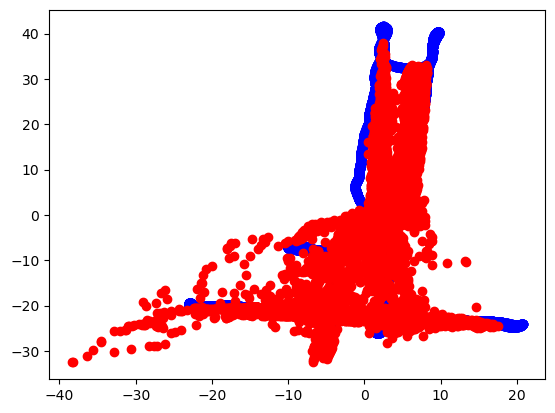

In [56]:
import matplotlib.pyplot as plt

# Assuming you have the ground truth positions and predicted positions as lists or arrays
ground_truth_positions = y_test_del 
predicted_positions = y_pred_del 

# Plotting the ground truth positions
plt.scatter(y_test_del[:,0],y_test_del[:,1],c='blue' , label='test')
plt.scatter(y_pred_del[:,0],y_pred_del[:,1],c='red' , label='pred')


# Labeling the axes and adding a legend

# Displaying the plot
plt.show()
